<a href="https://colab.research.google.com/github/itssofiarce/AAII-TUIA-Alomar-Arce/blob/main/AAII_TUIA_TP1_EJ_1_Alomar_Arce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCCIÓN

 En el siguiente ejercicio construimos modelos de regresión para resolver un problema en particular utilizando redes neuronales. El objetivo es predecir con precisión el índice de rendimiento académico de los estudiantes a partir de los atributos de un dataset. En el desarrollo del script entrenamos y evaluamos los modelos utilizando métricas y gráficos, mediante los cuales generamos interpretaciones y resultados. Al final, planteamos algunas conclusiones.

In [ ]:
!pip install -q gdown


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

import os


from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, RandomFlip, RandomContrast, BatchNormalization, RandomTranslation, Flatten, Dropout, LeakyReLU, ReLU, Activation
from pathlib import Path


In [ ]:
import gdown
import os.path as osp
import zipfile
import pandas as pd

# TP1-1-student_performance.zip
DATA_TP1_1 = 'https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc'

# Descargar TP1-1
var = gdown.download(DATA_TP1_1)

# Extraer TP1-1
with zipfile.ZipFile(f'{var}', 'r') as zip_ref:
    zip_ref.extractall('./TP1-1')

# Variable que almacena el path del dataset extraído
DATA_DIRECTORY_TP1_1 = osp.abspath('TP1-1')

# Listar los archivos en el directorio extraído para encontrar el CSV
import os
files_in_directory = os.listdir(DATA_DIRECTORY_TP1_1)
print("Archivos extraídos:", files_in_directory)


# Encontrar y cargar el archivo CSV
for file in files_in_directory:
    if file.endswith(".csv"):
        csv_file_path = osp.join(DATA_DIRECTORY_TP1_1, file)
        df = pd.read_csv(csv_file_path)
        print("CSV cargado exitosamente.")

Downloading...
From: https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc
To: /content/TP1-1-student_performance.zip
100%|██████████| 49.7k/49.7k [00:00<00:00, 17.2MB/s]

Archivos extraídos: ['Student_Performance.csv']
CSV cargado exitosamente.


# EXPLORACIÓN DE DATOS

In [ ]:
#apreciamos el nombre de las columnas.
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
#obsevamos los cinco primeros registros dataframe. Esto también devuelve la cantidad de columnas.
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
#observamos los último 5 registros del df. Esto nos devuelve además el total de registros.
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [ ]:
#Renombramos el df
train_df = df

In [ ]:
#Exploramos los datos de las columnas

def analyze_dataset(df):
    cols = df.columns

    for col in cols:
        print("--------------------")
        print(f"Columna: {col}")
        print(f"Cantidad de valores nulos: {df[col].isnull().sum()}")
        print(f"Cantidad de valores únicos: {df[col].nunique()}")
        print(f"Tipo de dato: {df[col].dtype}")

        if df[col].dtype == "object":
            print("Valores únicos: ", df[col].unique()[:10])  # Mostrar solo los primeros 10 valores únicos
            print("Cantidad de veces que aparece cada valor:")
            print(df[col].value_counts().head(10))  # Mostrar las primeras 10 categorías
        else:
            # Si es una columna numérica
            if df[col].nunique() < 10:
                print("Valores únicos: ", df[col].unique())
                print("Cantidad de veces que aparece cada valor:")
                value_counts = df[col].value_counts()
                for value, count in value_counts.items():
                    print(f"{value}: {count} veces")
            else:
                # Mostrar estadísticas descriptivas
                print(f"Media: {df[col].mean():.2f}")
                print(f"Desvío estándar: {df[col].std():.2f}")
                print(f"Mínimo: {df[col].min()}")
                print(f"Máximo: {df[col].max()}")
        print("--------------------")

# Ejecutar la función mejorada
analyze_dataset(df)


--------------------
Columna: Hours Studied
Cantidad de valores nulos: 0
Cantidad de valores únicos: 9
Tipo de dato: int64
Valores únicos:  [7 4 8 5 3 6 2 1 9]
Cantidad de veces que aparece cada valor:
1: 1152 veces
6: 1133 veces
7: 1129 veces
3: 1119 veces
9: 1115 veces
5: 1094 veces
8: 1088 veces
4: 1085 veces
2: 1085 veces
--------------------
--------------------
Columna: Previous Scores
Cantidad de valores nulos: 0
Cantidad de valores únicos: 60
Tipo de dato: int64
Media: 69.45
Desvío estándar: 17.34
Mínimo: 40
Máximo: 99
--------------------
--------------------
Columna: Extracurricular Activities
Cantidad de valores nulos: 0
Cantidad de valores únicos: 2
Tipo de dato: object
Valores únicos:  ['Yes' 'No']
Cantidad de veces que aparece cada valor:
Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64
--------------------
--------------------
Columna: Sleep Hours
Cantidad de valores nulos: 0
Cantidad de valores únicos: 6
Tipo de dato: int64
Valores únicos:  [

Podemos apreciar que no hay valores nulos en ninguna de los regitros para cada atributo. La variable objetivo "Performance Index" es de tipo float, lo cual resulta deseable en un poroblema de regresión. Las variables numéricas son int64, las cuales al estandarizarse serán convertidas a float. Se observa que La variable categórica "Extracurricular Activities" adopta dos valores "Yes" y "No" y ambas clases están balaceadas.

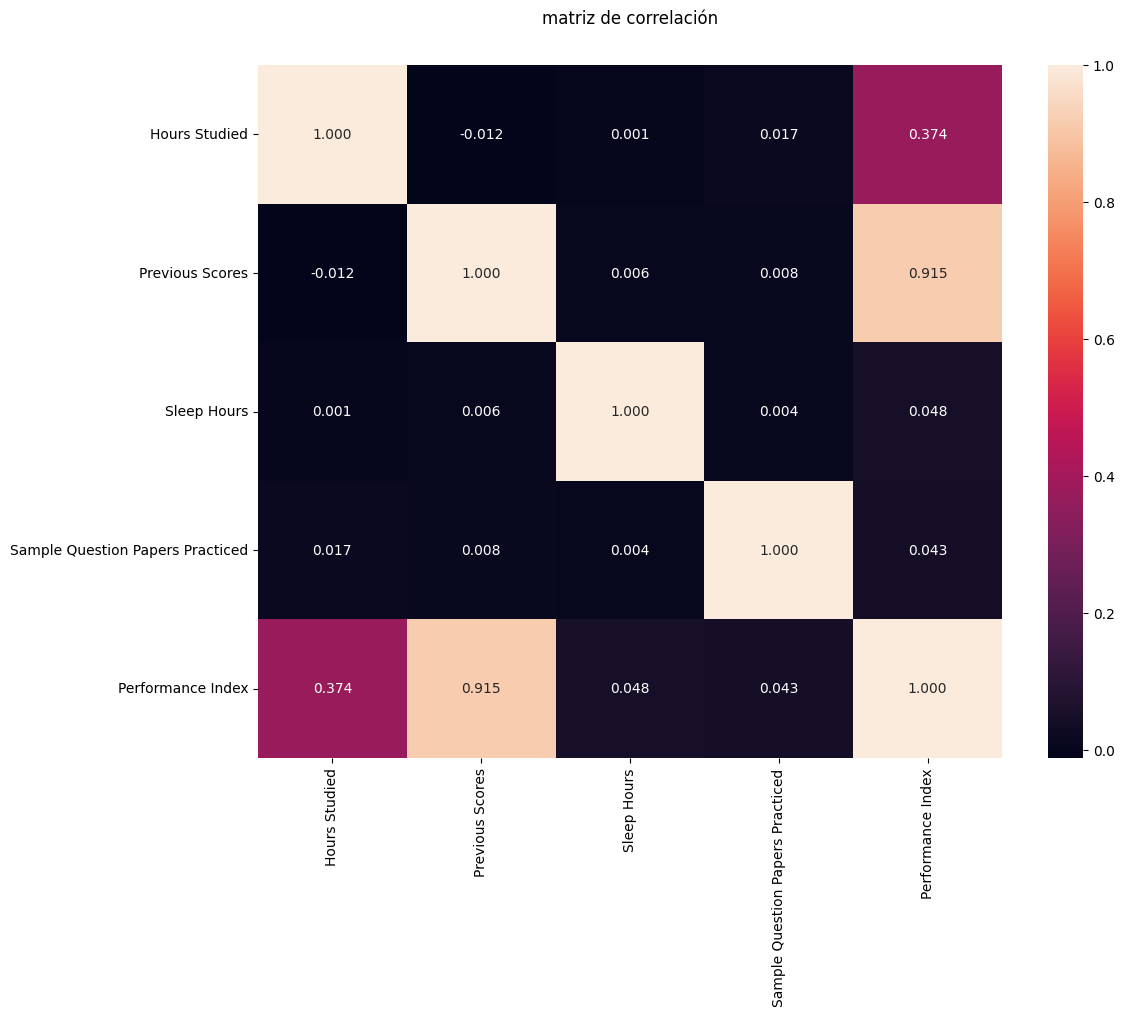

In [ ]:
  plt.figure(figsize=(12, 9))

  sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".3f")

  plt.title('matriz de correlación', pad = 30)

  plt.show()

La variable "Previous Scores" Tiene una importante correlación según el índice de Pearson (la cual es lineal) con la varialbe objetivo "Performance Index". El resto de las varibles pareciera tener una correlación desprecialbe tanto unas con otras como la con la variable objetivo.

In [ ]:
from scipy import stats



# p_value para 'Performance Index' en relación a la variable categórica 'Extracurricular Activities'
_ , p_value = stats.f_oneway(
    df['Performance Index'][df['Extracurricular Activities'] == 'Yes'],
    df['Performance Index'][df['Extracurricular Activities'] == 'No']
)

print(f"P-value: {p_value}")


P-value: 0.014184491568582584


P-value (0.014) es menor que el umbral común de significancia (0.05). Esto indica que hay evidencia estadísticamente significativa para rechazar la hipótesis nula, lo que significa que las medias de "Performance Index" para los diferentes grupos de "Extracurricular Activities" (Yes/No) son diferente. Pues, la participación o no en actividades extracurriculares está asociada con diferencias en el "Performance Index". Recordemos que la hipótesis nula es aquella que considera que los dos grupos no se diferencian, es decir, que se comportarían del mismo modo que si fueran uno solo.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


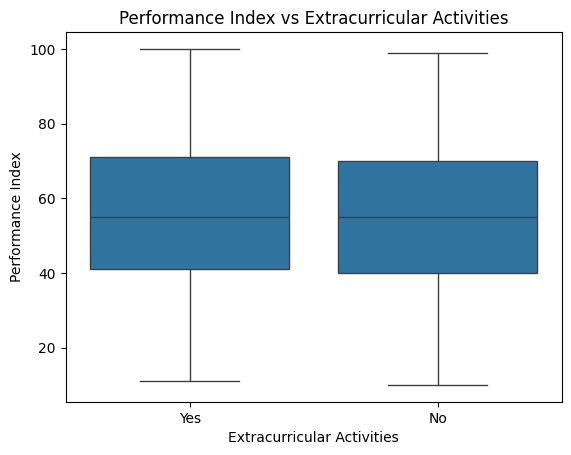

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja para visualizar la relación
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=df)
plt.title('Performance Index vs Extracurricular Activities')
plt.show()


El box plot muestra una mediana similar (en torno a 60), lo que sugiere que el "Performance Index" central es bastante similar para los estudiantes con y sin actividades extracurriculares. Además hay la dispersión similar dado que la caja muestra un rango intercuartil parecido entre los dos grupos, lo que indica que una dispersión (variabilidad) en el "Performance Index" es comparable entre los estudiantes que participaron o no en actividades extracurriculares. Por último, los bigotes en ambos grupos son aproximadamente simétricos, lo que denota que que no hay una asimetría notable en los datos. Se deduce que el gráfico no muestra una diferencia significativa entre los grupos que los diferencie. Sin embargo, el resultado del p-value sí nos permite inferir lo contrario.

# CONSUTRUCCIÓN DE MODELOS

Previo a a la construcción de cada modelo, hacemos la transfomaciones de datos pertinentes: estandarización para las variables numéricas y pasamos a one-hot la categórica. Las métricas de evalución de los modelos son RMSE para el loss y MAE para la predicción tanto en traning como test.

## 1 - MODELO SIMPLIFICADO: Utilizando la menor cantidad de variables posibles

El análsis previo de datos habilita a construir un modelo con menos variables que las totales. En primer lugar optamos por utilizar "Previous Scores" y "Extracurricular Activities" porque pudimos hacer interpretaciones sobre su pertinencia. Sin embargo, a partir de una indagación netamente exploratoria, advertimos que al utilizar "Hours Studied" y "Previous Scores" en cojunto se obtiene una perfomance aceptable del modelo. Si, además, agregamos "Extracurricular Activities", las métricas mejoran, pero de modo despreciable, por lo que optamos por quedarno sólo con aquellas dos para el modelo simplificado.



In [ ]:
# Defino un diccionario para definir el tipo de dato de cada columna
column_types = {
    'Hours Studied': "numeric",
    'Previous Scores': "numeric",
    #'Extracurricular Activities': "categoric",
}

# Diccionario para almacenar media y desvío estándar de las columnas numéricas.
# Me va a servir para realizar predicciones en el futuro.
numeric_stats = {}

# Diccionario para almacenar los valores únicos de las columnas categóricas.
# Me va a servir para realizar predicciones en el futuro.
categoric_values = {}

preprocessed_train_df = pd.DataFrame()
preprocessed_test_df = pd.DataFrame()

# Preprocesamiento del set de entrenamiento
for col in column_types.keys():
    if column_types[col] == "categoric":
        num_classes = train_df[col].nunique()
        # Obtengo el one-hot encoding de la columna
        one_hot = pd.get_dummies(train_df[col], prefix=col, dtype=np.float32)
        # Agrego las columnas al dataset preprocesado
        preprocessed_train_df = pd.concat([preprocessed_train_df, one_hot], axis=1)
        # Almaceno los valores únicos
        categoric_values[col] = train_df[col].unique()
    else:
        # Normalizo la columna
        preprocessed_train_df[col] = (train_df[col] - train_df[col].mean()) / train_df[col].std()
        # Almaceno media y desvío estándar
        numeric_stats[col] = {
            "mean": train_df[col].mean(),
            "std": train_df[col].std()
        }

# Agrergo la columna "Performance Index" al dataset preprocesado
preprocessed_train_df["Performance Index"] = train_df["Performance Index"]

# Drop nan values
preprocessed_train_df = preprocessed_train_df.dropna()

# Defino los vectores X_train, y_train, X_test e y_test
X_train = preprocessed_train_df.drop("Performance Index", axis=1).values.astype(np.float32)
y_train = preprocessed_train_df["Performance Index"].values.astype(np.float32)

print(X_train.shape, y_train.shape)

(10000, 2) (10000,)


In [ ]:
# RMSE como función de pérdida
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Definir el modelo
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # No se especifica activación, lo cual es equivalente a 'linear'
])

model.summary()

# Compilar el modelo utilizando RMSE como función de pérdida
model.compile(optimizer='adam', loss=rmse, metrics=['mean_absolute_error'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 56.7228 - mean_absolute_error: 53.6009 - val_loss: 41.0434 - val_mean_absolute_error: 38.7629
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 25.8794 - mean_absolute_error: 24.1504 - val_loss: 5.2745 - val_mean_absolute_error: 4.3501
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2567 - mean_absolute_error: 3.4351 - val_loss: 2.6188 - val_mean_absolute_error: 2.0802
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4376 - mean_absolute_error: 1.9595 - val_loss: 2.4000 - val_mean_absolute_error: 1.9088
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3147 - mean_absolute_error: 1.8701 - val_loss: 2.3669 - val_mean_absolute_error: 1.8785
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2694 - mean_absolute_error: 1.8301 - val_loss: 2.3398 - val_mean_absolute_error: 1.8622
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2758 - mean_absolute_erro

Como puede aprecierse la cantidad de parámetros es relativamente pequeña para un problema de regresión resuelto con redes neuronales. Si a partir del análsis nos hubiésemos guiado solamente por el índice de Pearson para evaluar la relación entre las variables, no habríamos advertido la relaición entre "Hours Studied" y "Previous Scores" que en conjuto tienen con la variable objetivo. Evidentemente presentan una relación no lienal y es por ello que el coeficiente de Pearson no la refleja.



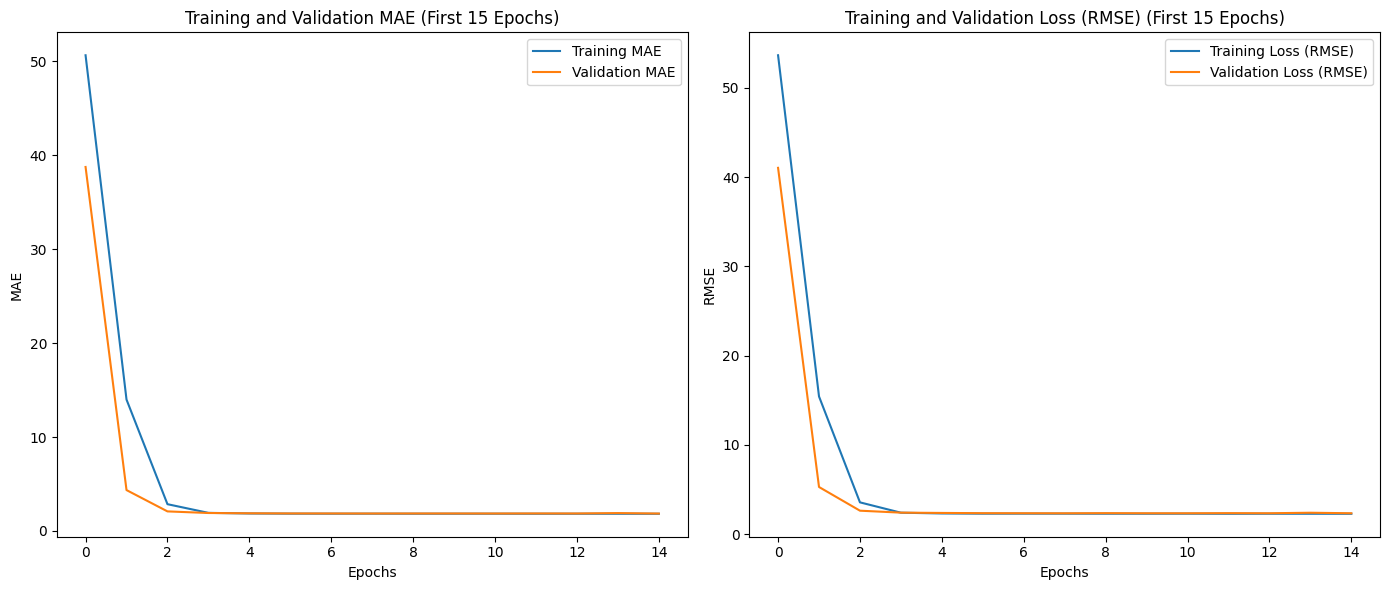

In [ ]:

# Definir el número de épocas a graficar
epoc = 15  # Puedes cambiar este valor según sea necesario

# Definir el rango de las primeras 'epoc' épocas
epochs_range = range(epoc)

# Obtener las métricas de las primeras 'epoc' épocas
mae = history.history['mean_absolute_error'][:epoc]
val_mae = history.history['val_mean_absolute_error'][:epoc]

loss = history.history['loss'][:epoc]
val_loss = history.history['val_loss'][:epoc]

# Graficar la evolución de las métricas en las primeras 'epoc' épocas
plt.figure(figsize=(14, 6))

# Gráfico para MAE (Error absoluto medio)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title(f'Training and Validation MAE (First {epoc} Epochs)')

# Gráfico para la pérdida RMSE
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss (RMSE)')
plt.plot(epochs_range, val_loss, label='Validation Loss (RMSE)')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title(f'Training and Validation Loss (RMSE) (First {epoc} Epochs)')

plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()




El análisis del gráfico nos permite apreciar un pequeño overfitting al comienzo del entrenamiento en ambas métricas que ya para la época 4 resutla despreciable.

## 2- COMPLEJIZACIÓN DEL MODELO: agregamos capas densas al modelo de sólo 2 variables.

*Agregamos una capa densa manteniendo la cantidad de variables del punto anterior. Variamos cantidad de épocas y definimos LeakyReLu como función de activación para establecer si hay una mejora del modelo.







In [ ]:
# Definir RMSE como función de pérdida personalizada
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Definir el modelo
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, LeakyReLU(alpha=0.01)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # No se especifica activación, lo cual es equivalente a 'linear'
])

model.summary()

# Compilar el modelo utilizando RMSE como función de pérdida
model.compile(optimizer='adam', loss=rmse, metrics=['mean_absolute_error'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 56.3781 - mean_absolute_error: 53.0156 - val_loss: 24.7262 - val_mean_absolute_error: 21.6107
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.4408 - mean_absolute_error: 11.3723 - val_loss: 5.8204 - val_mean_absolute_error: 4.8033
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6734 - mean_absolute_error: 3.7757 - val_loss: 2.6165 - val_mean_absolute_error: 2.0787
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4477 - mean_absolute_error: 1.9692 - val_loss: 2.3825 - val_mean_absolute_error: 1.8933
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3043 - mean_absolute_error: 1.8462 - val_loss: 2.4482 - val_mean_absolute_error: 1.9476
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3261 - mean_absolute_error: 1.8672 - val_loss: 2.3512 - val_mean_absolute_error: 1.8561
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2962 - mean_absolute_erro

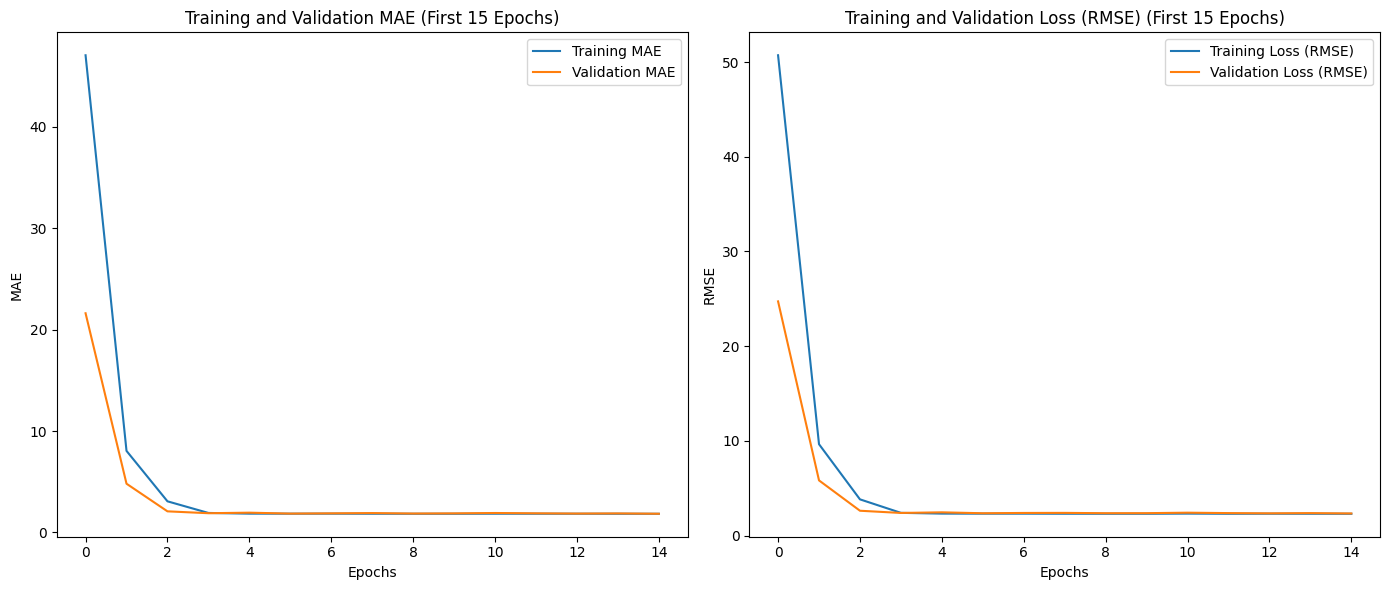

In [ ]:

# Definir el número de épocas a graficar
epoc = 15  # Puedes cambiar este valor según sea necesario

# Definir el rango de las primeras 'epoc' épocas
epochs_range = range(epoc)

# Obtener las métricas de las primeras 'epoc' épocas
mae = history.history['mean_absolute_error'][:epoc]
val_mae = history.history['val_mean_absolute_error'][:epoc]

loss = history.history['loss'][:epoc]
val_loss = history.history['val_loss'][:epoc]

# Graficar la evolución de las métricas en las primeras 'epoc' épocas
plt.figure(figsize=(14, 6))

# Gráfico para MAE (Error absoluto medio)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title(f'Training and Validation MAE (First {epoc} Epochs)')

# Gráfico para la pérdida RMSE
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss (RMSE)')
plt.plot(epochs_range, val_loss, label='Validation Loss (RMSE)')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title(f'Training and Validation Loss (RMSE) (First {epoc} Epochs)')

plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()



Haber aumentado la cantidad de capas densas y el número de épocas no mejora el rendimiento del modelo de 2 variables, sino que inlcuso emperora un poco, motrando una performance similar en las métricas.

## 3- COMPLEJIZACIÓN DEL MODEL0: utilizamos todas la variables.



Repetimos la estructura e hiperparámetros del modelo 1 y agregamos todas las variables.

In [ ]:
# Defino un diccionario para definir el tipo de dato de cada columna
column_types = {
    'Hours Studied': "numeric",
    'Previous Scores': "numeric",
    'Extracurricular Activities': "categoric",
    'Sleep Hours': "numeric",
    'Sample Question Papers Practiced': "numeric",

}

# Diccionario para almacenar media y desvío estándar de las columnas numéricas.
# Me va a servir para realizar predicciones en el futuro.
numeric_stats = {}

# Diccionario para almacenar los valores únicos de las columnas categóricas.
# Me va a servir para realizar predicciones en el futuro.
categoric_values = {}

preprocessed_train_df = pd.DataFrame()
preprocessed_test_df = pd.DataFrame()

# Preprocesamiento del set de entrenamiento
for col in column_types.keys():
    if column_types[col] == "categoric":
        num_classes = train_df[col].nunique()
        # Obtengo el one-hot encoding de la columna
        one_hot = pd.get_dummies(train_df[col], prefix=col, dtype=np.float32)
        # Agrego las columnas al dataset preprocesado
        preprocessed_train_df = pd.concat([preprocessed_train_df, one_hot], axis=1)
        # Almaceno los valores únicos
        categoric_values[col] = train_df[col].unique()
    else:
        # Normalizo la columna
        preprocessed_train_df[col] = (train_df[col] - train_df[col].mean()) / train_df[col].std()
        # Almaceno media y desvío estándar
        numeric_stats[col] = {
            "mean": train_df[col].mean(),
            "std": train_df[col].std()
        }

# Agrergo la columna "Performance Index" al dataset preprocesado
preprocessed_train_df["Performance Index"] = train_df["Performance Index"]

# Drop nan values
preprocessed_train_df = preprocessed_train_df.dropna()

# Defino los vectores X_train, y_train, X_test e y_test
X_train = preprocessed_train_df.drop("Performance Index", axis=1).values.astype(np.float32)
y_train = preprocessed_train_df["Performance Index"].values.astype(np.float32)

print(X_train.shape, y_train.shape)


(10000, 6) (10000,)


In [ ]:
# Definir RMSE como función de pérdida personalizada
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Definir el modelo
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # No se especifica activación, lo cual es equivalente a 'linear'
])

model.summary()

# Compilar el modelo utilizando RMSE como función de pérdida
model.compile(optimizer='adam', loss=rmse, metrics=['mean_absolute_error'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 53.6751 - mean_absolute_error: 50.3468 - val_loss: 6.5090 - val_mean_absolute_error: 5.0344
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7989 - mean_absolute_error: 3.7310 - val_loss: 3.2425 - val_mean_absolute_error: 2.5604
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9415 - mean_absolute_error: 2.3343 - val_loss: 2.5105 - val_mean_absolute_error: 1.9847
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3785 - mean_absolute_error: 1.8773 - val_loss: 2.2697 - val_mean_absolute_error: 1.8053
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1652 - mean_absolute_error: 1.7368 - val_loss: 2.2046 - val_mean_absolute_error: 1.7566
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1611 - mean_absolute_error: 1.7336 - val_loss: 2.1475 - val_mean_absolute_error: 1.7086
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1420 - mean_absolute_error: 1

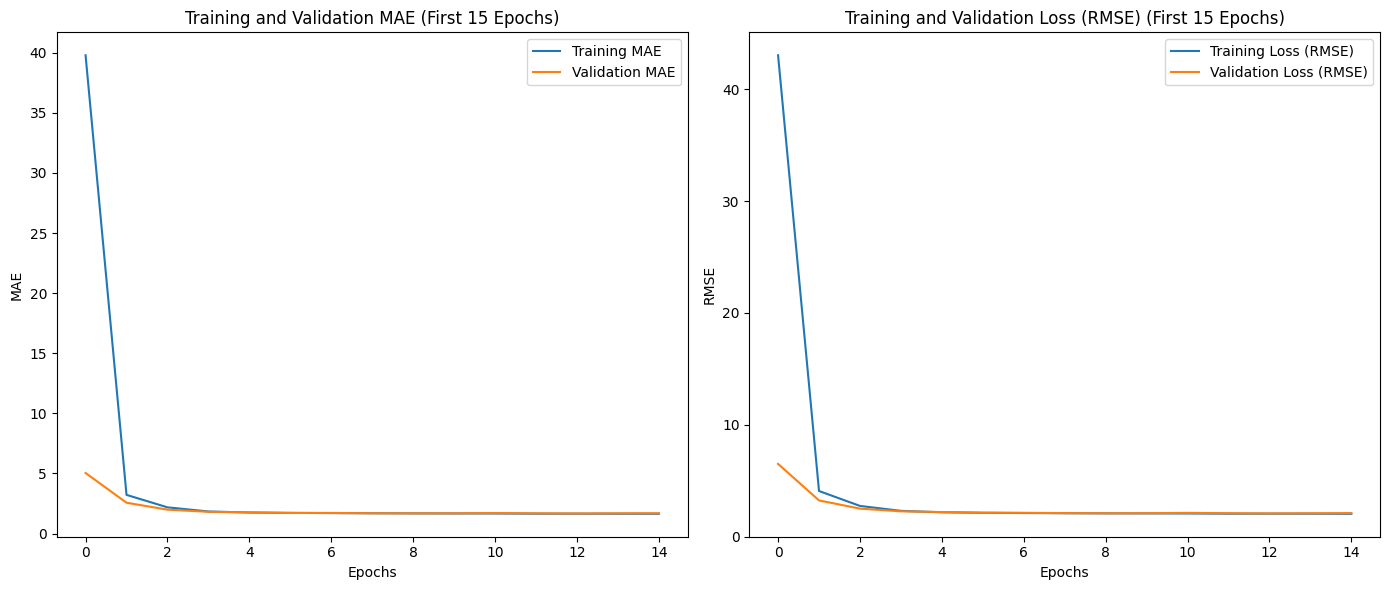

In [ ]:

# Definir el número de épocas a graficar
epoc = 15  # Puedes cambiar este valor según sea necesario

# Definir el rango de las primeras 'epoc' épocas
epochs_range = range(epoc)

# Obtener las métricas de las primeras 'epoc' épocas
mae = history.history['mean_absolute_error'][:epoc]
val_mae = history.history['val_mean_absolute_error'][:epoc]

loss = history.history['loss'][:epoc]
val_loss = history.history['val_loss'][:epoc]

# Graficar la evolución de las métricas en las primeras 'epoc' épocas
plt.figure(figsize=(14, 6))

# Gráfico para MAE (Error absoluto medio)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title(f'Training and Validation MAE (First {epoc} Epochs)')

# Gráfico para la pérdida RMSE
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss (RMSE)')
plt.plot(epochs_range, val_loss, label='Validation Loss (RMSE)')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title(f'Training and Validation Loss (RMSE) (First {epoc} Epochs)')

plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()

La métricas han mejorado un poco utilizando todas las variables con un modelo de dos capas densas

## 4- COMPLEJIZACIÓN DEL MODEL0: utilizamos todas la variables y agregamos capas densas.


Agregamos una capa densa utilizando todas las variables. Variamos cantidad de épocas y definimos tangente hiperbólica como función de activación para establecer si hay una mejora del modelo.

In [ ]:
# Definir RMSE como función de pérdida personalizada
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Definir el modelo
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='tanh'),  # Cambiado a tangente hiperbólica
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # No se especifica activación, lo cual es equivalente a 'linear'
])

model.summary()

# Compilar el modelo utilizando RMSE como función de pérdida
model.compile(optimizer='adam', loss=rmse, metrics=['mean_absolute_error'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 52.7624 - mean_absolute_error: 49.7229 - val_loss: 4.0098 - val_mean_absolute_error: 3.0920
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0816 - mean_absolute_error: 2.4294 - val_loss: 2.6145 - val_mean_absolute_error: 2.0873
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5716 - mean_absolute_error: 2.0507 - val_loss: 2.4263 - val_mean_absolute_error: 1.9212
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4233 - mean_absolute_error: 1.9381 - val_loss: 2.3050 - val_mean_absolute_error: 1.8332
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3008 - mean_absolute_error: 1.8420 - val_loss: 2.2319 - val_mean_absolute_error: 1.7744
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2223 - mean_absolute_error: 1.7761 - val_loss: 2.2396 - val_mean_absolute_error: 1.7820
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2067 - mean_absolute_error: 1

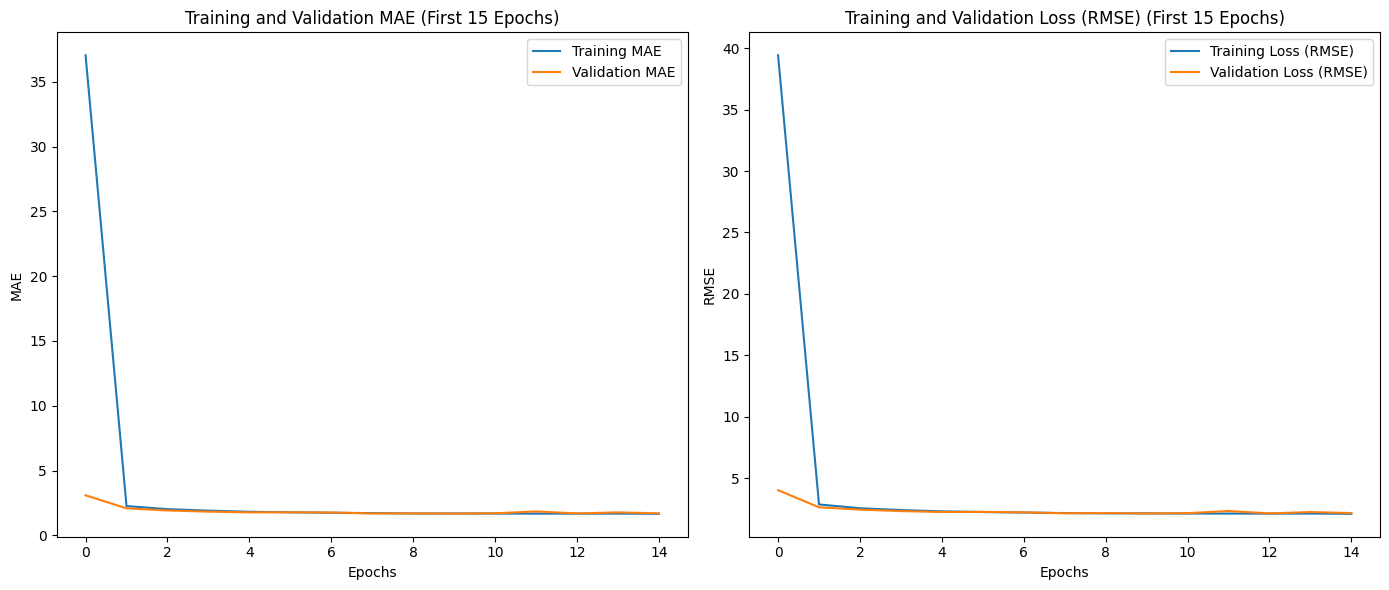

In [ ]:

# Definir el número de épocas a graficar
epoc = 15  # Puedes cambiar este valor según sea necesario

# Definir el rango de las primeras 'epoc' épocas
epochs_range = range(epoc)

# Obtener las métricas de las primeras 'epoc' épocas
mae = history.history['mean_absolute_error'][:epoc]
val_mae = history.history['val_mean_absolute_error'][:epoc]

loss = history.history['loss'][:epoc]
val_loss = history.history['val_loss'][:epoc]

# Graficar la evolución de las métricas en las primeras 'epoc' épocas
plt.figure(figsize=(14, 6))

# Gráfico para MAE (Error absoluto medio)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title(f'Training and Validation MAE (First {epoc} Epochs)')

# Gráfico para la pérdida RMSE
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss (RMSE)')
plt.plot(epochs_range, val_loss, label='Validation Loss (RMSE)')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title(f'Training and Validation Loss (RMSE) (First {epoc} Epochs)')

plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()

Las métricas son similares a las que obtuvimos anteriormente, por lo que agregar una capa densa, usar la función de activación de tangente hiperbólica y aumentar el número de épocas no devino en una mejor perfomace.

# CONCLUSIONES

Los cuatro modelos contruidos otorgan una predicción del redimiento académico de los etudiantes más que aceptable, con un error promedio de menos de dos puntos sobre un total de 100 en la nota. Durante el desarrollo del script variamos la estructura del modelo, hiperparámetos, funciones de activación y cantidad de variable a utilizar en cada uno. Se puede deducir que los cambios no aportan diferencias significativas en la predicción. Ahora bien, sí hay diferencia en el eficiencia de los modelos. El primero de ellos (modelo 1) presenta 641 parámetros que se deben entrenar. Al compararlo, por ejemplo, con el modelo 4 que tiene 3073 parámetros, se denota que es más eficiente debido a que la cantidad de parámetros de aquel aproximadamente es un quinto de éste último. Y, meditante el modelo 4, la predicción obtiene una mejora sólo del órden de la milésima parte de nota de los entudiantes. El problema resuelto no demanda mayor cantidad de costo computacional, por lo que es indistinto utilizar uno u otro modelo. Pero como conclusión, podemos afirmar que si la cantidad de datos aumentara o el problema a resolver fuera más complejo, optarímos por el modelo 1, dada su relativa simplicidad y performance aceptable reflejada en las métricas (MAE en test de 1.84 puntos sobre una nota de 1 a 100).